In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
# from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('/Users/dominicdebiaso/Development/datasets/kaggle_leaf_train.csv')
df_test = pd.read_csv('/Users/dominicdebiaso/Development/datasets/kaggle_leaf_test.csv')

### Data Processing

In [3]:
## Split data
X_train = df_train.drop(['id', 'species'], axis=1)
y_train = np.ravel(df_train[['species']]) #1D matrix
X_test = df_test.drop('id', axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(990, 192)
(990,)
(594, 192)


In [4]:
## Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Convert target feature into numerical format
le = LabelEncoder()
y_train = le.fit_transform(y_train)

## Futhermore convert to dummy for categorical crossentropy (ie. mlogloss)
y_train = pd.get_dummies(y_train).as_matrix() #to_categorical(y_train)
print(y_train.shape)

(990, 99)


### Model Development

In [13]:
model = Sequential()
model.add(Dense(1024, input_dim=192, init='uniform', activation='relu')) #Dense is regular fully connected NN
                                                                         #1000 neurons with 192 dimensions (# features)
                                                                         #hidden layer rectifier activation function
model.add(Dense(512, init='uniform', activation='relu'))
model.add(Dense(99, init='uniform', activation='softmax')) #softmax for output layer so probilistic dist. of outcomes
                                                           #99 neurons to match number of predictor categories
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #multiclass logloss
                                                                                       #efficient grad des (ie. ADAM)
                                                                                       #to learn weights
history = model.fit(X_train, y_train, 
                    batch_size=2000, nb_epoch=100, verbose=0) #batch of data to train on and use updated weights 
                                                             #computer gradient for every learning vector 
                                                             #and update weight
                                                             #better performance and convergence with higher batch
                                                             #esp. when using simple algo like sgd
                                                             #more complex algos like rmsprop and adam aren't affected
                                                             #epoch - number of iterations

In [70]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_19 (Dense)                 (None, 1024)          197632      dense_input_9[0][0]              
____________________________________________________________________________________________________
dense_20 (Dense)                 (None, 512)           524800      dense_19[0][0]                   
____________________________________________________________________________________________________
dense_21 (Dense)                 (None, 99)            50787       dense_20[0][0]                   
Total params: 773219
____________________________________________________________________________________________________


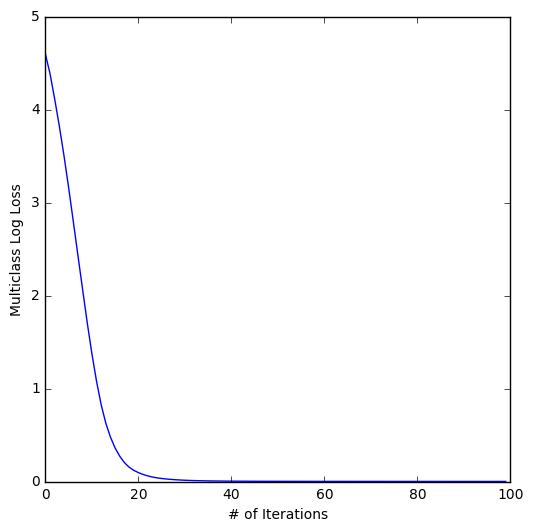

In [71]:
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'])
plt.xlabel('# of Iterations')
plt.ylabel('Multiclass Log Loss')

In [72]:
## Predict and create submission
y_pred_proba = model.predict_proba(X_test)
df_nn = pd.DataFrame(y_pred_proba, index=df_test['id'], columns=le.classes_)
df_nn.to_csv('/Users/dominicdebiaso/Desktop/kaggle_leaf_classification_neural_net.csv')

576/594 [============================>.] - ETA: 0s